<a href="https://colab.research.google.com/github/taliaora/planets/blob/master/Kopia_notatnika_Kopia_notatnika_CDT_CA_miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### CDT Data Analysis 2021 - Coursework (80%)
# Analysing gravitational wave signals 
## Deadline Jan 29th, 2pm.

#### <div class = "tip">Instructions</div>

Please ensure you have read the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb) before starting this coursework. 

**These assessments are equivalent to an exam**:
- Submit your work via email to the module organiser. Note that you will need to upload your final notebook exported to a pdf file. **Don't forget to click `run all` before you export it**. 
- Don't worry about how your code looks - marks are not given for pretty code, but rather for the approach used in solving the problem, your reasoning, explanation and answer.
- Please also take note of the University’s policy on **plagiarism**, which is outlined in your student handbooks.

#### <div class = "tip">Tips</div>


- Explain all your reasoning for each step. A *significant fraction* of the marks are given for explanations and discussion, as they evidence understanding of the analysis.  
- Some of these steps will take a while to run and compile. It's a good idea to add in print statements to your code throughout eg `print('this step is done')` to make sure that your bit of code has finished.
- Add the import packages statements at the top of your Jupyter notebook. We will use the `pandas` package to read in the data, with eg `dataIn=pd.read_csv('filename.csv')`.

***

Gravitational waves are disturbances in the curvature of spacetime, generated by accelerated masses, that propagate as waves outward from their source at the speed of light.  They are predicted in General Relativity and other theories of gravity and since 2017, they have now been observed!

In this exercise we will analyse some mock gravitational wave data from two unknown astrophysical objects merging together and coelescing. We will use a Monte Carlo Markov Chain (MCMC) to compare a scaled model that predicts how the wave changes depending on the total mass of the merging objects and their distance from us to the observed waveform.  This will allow us to determine the nature of the orbiting objects that merged to form the gravitational wave using MCMC, whether for instance they could be originating from merging white dwarfs, neutron stars or black holes.

The mock or simulated waveforms measure the strain as two compact, dense astrophysical objects coalesce. The strain describes the amplitude of the wave. The system is parameterised by the masses of the merging objects, $M_1$ and $M_2$, and their distance from the observer $D$.  

Other useful parameters and equations relevant for this assessment are given in the [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb).

***

***

## Part A - The data

1. Read in the datafile of the observed waveform `Observedwaveform.csv`. These files store the strain as a function of "GPS time" for the merger of two bodies. 

2. The GPS time of the merger for your waveform is 1205951542.153363.  Your data will need to be shifted so that the merger occurs at time = 0 secs.  This is required as we will compare our data with a which have the merger at t=0s. 

3. We need to estimate the average noise and its standard deviation in our data. This requires careful thought about where the noise can be seen in the waveform.   

**Answer:**

*Your answer here*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import scipy, matplotlib
from scipy.optimize import curve_fit
import numpy as np
import sys
from scipy.interpolate import interp1d
from scipy.stats import norm
%matplotlib inline
from numpy import mean

In [2]:
#Part A, 1
url = "https://raw.githubusercontent.com/haleygomez/Data-Analysis-2021/master/CDT_students/Observedwaveform.csv"
csv_read = pd.read_csv(url)

In [3]:
t_of_merger  = 1205951542.153363
df = pd.DataFrame.copy(csv_read)

In [4]:
#checking if it loaded correctly
df.head()

,strain,time (s)
0,8.101405e-23,1.205952e+09
1,1.019082e-22,1.205952e+09
2,1.226521e-22,1.205952e+09
3,1.396412e-22,1.205952e+09
4,1.522380e-22,1.205952e+09


In [5]:
#Part A, 2
#shifting the t so the merger occurs at 0
df_shifted = df.copy().sub([0, t_of_merger])

In [6]:
df_shifted.head()

,strain,time (s)
0,8.101405e-23,-0.164658
1,1.019082e-22,-0.164170
2,1.226521e-22,-0.163681
3,1.396412e-22,-0.163193
4,1.522380e-22,-0.162704


In [7]:
STD = df_shifted.std( axis = 0)
print(STD)

strain      1.613037e-22
time (s)    8.971761e-02
dtype: float64


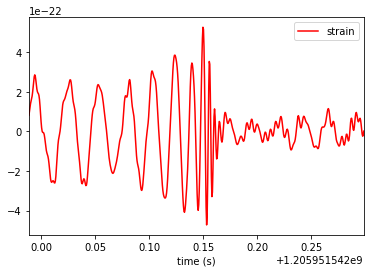

In [8]:
#We're going to visualise whether the merger time moved to zero, comparing two plots below
df.plot(kind= 'line', y = 'strain', x = 'time (s)', color='red')
plt.show()  


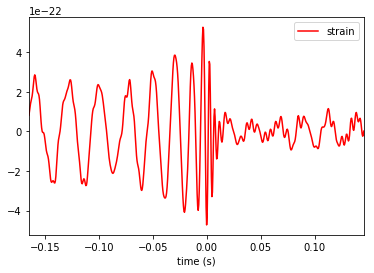

In [9]:
#Checking whether merger time moved to t=0
df_shifted.plot(kind= 'line', y = 'strain', x = 'time (s)', color='red')
plt.show() 

In [10]:
Data = (df_shifted[df_shifted['time (s)'] >=0]).copy()
# The noise is visible just after the merger, take the values where t => 0 
xData = df_shifted['time (s)']
yData = df_shifted['strain']

strain_mean = np.mean(yData)
strain_std = np.std(yData)

def func(x, amplitude, center, width):
    return amplitude * np.sin(np.pi * (x - center) / width)


# these are estimated from a scatterplot of the data
initialParameters = np.array([-0.85, 0.0175, 0.0175])

# curve fit the test data
fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print('Parameters:', fittedParameters)
print('RMSE:', RMSE)
print('R-squared:', Rsquared)
print('The mean squared errors is', MSE)
print('The mean of a strain affected by the noise is {0:.3e} and the standard deviation is {1:.3e}'.format(strain_mean, strain_std))


('Parameters:', array([4.83001306e-19, 1.75000000e-02, 1.75000000e-02]))
('RMSE:', 3.3946270267737636e-19)
('R-squared:', -4434163.411786988)
('The mean squared errors is', 1.1523492650902884e-37)
The mean of a strain affected by the noise is 4.055e-24 and the standard deviation is 1.612e-22


In [11]:
yData.head()

0    8.101405e-23
1    1.019082e-22
2    1.226521e-22
3    1.396412e-22
4    1.522380e-22
Name: strain, dtype: float64

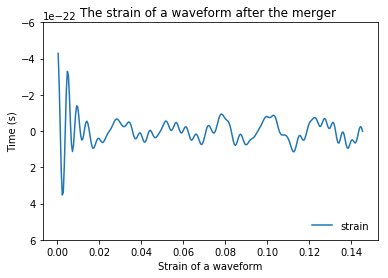

In [12]:
plt.plot(Data['time (s)'], Data['strain'])
plt.xlabel('Strain of a waveform')
plt.ylabel('Time (s)')
plt.legend(frameon=False,scatterpoints=1,loc='lower right') # add a legend to explain to reader the curve and points
plt.ylim(6*10**-22, -6*10**-22)
plt.title('The strain of a waveform after the merger ')
plt.show() 

In [13]:
#Part A, 3
noise = np.std(Data[Data['time (s)'] > 0])
print(noise)


strain      7.310677e-23
time (s)    4.200425e-02
dtype: float64


In [14]:
noise = 7.310677e-23

***

## Part B - Using model waveforms to estimate the total mass and distance to the system "a by-eye estimate") 

In this part of the question we will attempt to produce a waveform for any mass and distance values using a reference waveform with $M=40 M_{sun}$, $D=1$Mpc and $q=M_2/M_1 = 1$ and scaling it by any new mass and/or distance.    

The reference waveform/template we will use is```reference_Mtot40Msun_Dist1Mpc.csv```. 

You will need to follow the steps below when answering this question:

1. Open the reference/template file using the `pandas` package. Write a function in python to scale the time and strain of any waveform with $q=1$, total mass $M$ and distance $D$ from the reference waveform file ```reference_Mtot40Msun_Dist1Mpc.csv``` using the equations for how the waveform strain and time depends on mass and distance from [Chapter 8 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2021/blob/master/blended_exercises/Chapter8/Chapter8.ipynb). 

2. Test your function works by substituting in $M=70\,M_{sun}$ and $D=5$Mpc, and compare your resulting waveform with the template in `reference_Mtot70Msun_Dist5Mpc.csv`.  Comment on your result. 
 
3. Use your function to scale the template waveform ($M=40 M_{sun}$, $D=1$Mpc) to make an initial rough estimate "by eye" of the total mass and distance that "best" fits your data (e.g. to within +/- 5 Msun, +/- 100 Mpc). 

**Answer:**

In [15]:
#Part B, 1
#loading the data into pandas dataframe
csv2 ='https://raw.githubusercontent.com/haleygomez/Data-Analysis-2021/master/CDT_students/reference_Mtot40Msun_Dist1Mpc.csv'
reference_waveform = pd.read_csv(csv2).copy()

In [16]:
#check if it loaded in correctly
reference_waveform.head()

,strain,time (s)
0,-6.162294e-20,-11.946102
1,-6.140841e-20,-11.945614
2,-6.113607e-20,-11.945126
3,-6.080617e-20,-11.944637
4,-6.041902e-20,-11.944149



After shifting the time, the merger occurs at t = 0. 
The following equations will be used in this assignments:

$t' = ( \frac{M'}{M}) t$ 

and

$h(t, M, D) = ( \frac{M}{M '})(\frac{D '}{D} ) h(t')$

where: 
$t = 0$

In case we wanted to calculate $h(t')$, we would have to rearrange the equation, giving us:

$h(t') = \frac{h(t, M, D)}{(\frac{M}{M'})(\frac{D'}{D})}$ 

 



In [17]:
# creating the function for scaling the strain
strain = reference_waveform['strain']
def scale_strain2 (strain):
  scaleddata = []
  mass2 = round(45, 30)
  mass_prime= round(40,30)
  d_prime = round(1,30)
  d2  = round(300, 30)
  for x in strain.iteritems():
           strain_scaled2 = ((mass2/mass_prime)*(d_prime/d2))*x[1]
           scaleddata.append(strain_scaled2)
  return (scaleddata)


#merger_time = 0

strain_sca_ini = scale_strain2(strain)

print(strain_sca_ini)

[-2.310860276197549e-22, -2.3028153275403465e-22, -2.2926025349436177e-22, -2.280231347063427e-22, -2.265713267984625e-22, -2.2490618270006654e-22, -2.230292565915586e-22, -2.2094230207118094e-22, -2.186472703640316e-22, -2.1614630875833853e-22, -2.134417586198322e-22, -2.1053615321161675e-22, -2.0743221533305476e-22, -2.0413285477985415e-22, -2.0064116562771588e-22, -1.9696042334206557e-22, -1.9309408171656007e-22, -1.8904576964321758e-22, -1.8481928771718227e-22, -1.8041860467928805e-22, -1.7584785369974265e-22, -1.7111132850640065e-22, -1.6621347936124165e-22, -1.6115890888944886e-22, -1.5595236778782262e-22, -1.505987503794795e-22, -1.4510308999485593e-22, -1.394705542458191e-22, -1.3370644017450777e-22, -1.2781616927948873e-22, -1.2180528242389126e-22, -1.1567943463029557e-22, -1.094443897672583e-22, -1.0310601513245993e-22, -9.667027593755989e-23, -9.014322969993759e-23, -8.353102054658529e-23, -7.683987343550524e-23, -7.007608830004037e-23, -6.324603412164215e-23, -5.63561429366

In [18]:
#Part B, 2
#Checking if the scaling works using M = 70 and d2 = 5
strain = reference_waveform['strain']
def scale_strain2 (strain):
  scaleddata = []
  mass2 = round(70, 30)
  mass_prime= round(40,30)
  d_prime = round(1,30)
  d2  = round(5, 30)
  for x in strain.iteritems():
           strain_scaled2 = ((mass2/mass_prime)*(d_prime/d2))*x[1]
           scaleddata.append(strain_scaled2)
  return (scaleddata)


strain_sca2 = scale_strain2(strain)

print(strain_sca2)

[-2.1568029244510457e-20, -2.1492943057043233e-20, -2.1397623659473764e-20, -2.1282159239258655e-20, -2.1146657167856502e-20, -2.0991243718672876e-20, -2.0816063948545472e-20, -2.0621281526643556e-20, -2.0407078567309618e-20, -2.0173655484111598e-20, -1.9921230804517675e-20, -1.9650040966417566e-20, -1.9360340097751776e-20, -1.9052399779453054e-20, -1.8726508791920148e-20, -1.8382972845259454e-20, -1.8022114293545607e-20, -1.7644271833366976e-20, -1.7249800186937012e-20, -1.6839069770066884e-20, -1.6412466345309315e-20, -1.5970390660597394e-20, -1.5513258073715886e-20, -1.5041498163015227e-20, -1.4555554326863444e-20, -1.4055883368751422e-20, -1.3542955066186554e-20, -1.301725172960978e-20, -1.2479267749620725e-20, -1.192950913275228e-20, -1.1368493026229851e-20, -1.079674723216092e-20, -1.0214809711610776e-20, -9.623228079029593e-21, -9.02255908750559e-21, -8.413368105327509e-21, -7.796228584347961e-21, -7.171721520647156e-21, -6.540434908003768e-21, -5.902963184686601e-21, -5.2599066

In [19]:
time = reference_waveform['time (s)']
time.head()

0   -11.946102
1   -11.945614
2   -11.945126
3   -11.944637
4   -11.944149
Name: time (s), dtype: float64

In [20]:
#preparation for the check whether the function for scaling the time works
time = reference_waveform['time (s)']    
def scale_time (time):
  scaled_time = []
  mass2 = round(70, 30)
  mass_prime= round(40,30)
  for x in time.iteritems():
    time_scaled2 = ((mass2/mass_prime)*x[1])
    scaled_time.append(time_scaled2)
  return (scaled_time)


scaled_time2 = scale_time(time)

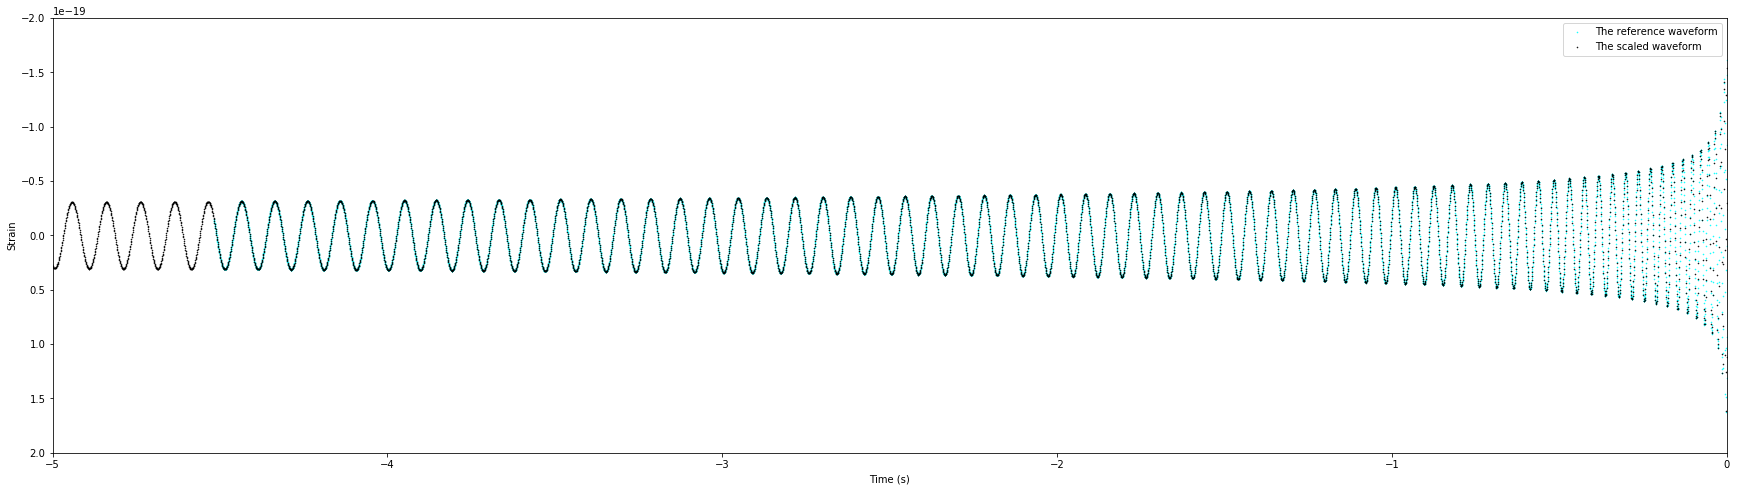

In [21]:
#comparing the resulting waveform with the template
csv5 ='https://raw.githubusercontent.com/haleygomez/Data-Analysis-2021/master/CDT_students/reference_Mtot70Msun_Dist5Mpc.csv'
reference_waveform5 = pd.read_csv(csv5).copy()

plt.scatter( y = reference_waveform5['strain'], x = reference_waveform5['time (s)'], color='cyan', s = 0.3)
plt.scatter( y = strain_sca2, x = scaled_time2,  color='black', s = 0.3)
plt.legend(('The reference waveform', 'The scaled waveform'))

x = reference_waveform['time (s)']
plt.plot()
plt.gcf().set_size_inches(30, 8)
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.xlim(-5,0)
plt.ylim(2*10**-19, -2*10**-19)
plt.show() 

The graph above shows that the waveform was correctly scaled. Both, the reference and the scaled waveform perfectly align. The reference waveform data contained less data points (see cyan colour on the plot), yet this does not affect our analysis in any way. 

In [22]:
#Part B, 3
#make an initial rough estimate "by eye" of the total mass and distance that "best" fits your data
#modify the scale function so mass and d can be easily adjusted by stating the variables before running the function
strainref = reference_waveform['strain']
mass2 = round(45, 30)
mass_prime= round(40,30) 
d_prime = round(1,30)
d2  = round(700, 30)
def scale_strain_ref (strainref):
  scaleddata = []
  # mass2 = round(45, 30)
  # mass_prime= round(40,30)
  for x in strainref.iteritems():
           strain_scaled_ref = ((mass2/mass_prime)*(d_prime/d2))*x[1]
           scaleddata.append(strain_scaled_ref)
  return (scaleddata)


strain_sca_ref = scale_strain_ref(strain)

time = reference_waveform['time (s)']
def scale_time (time):
  scaled_time = []
  
  for x in time.iteritems():
    time_scaled2 = ((mass2/mass_prime)*x[1])
    scaled_time.append(time_scaled2)
  return (scaled_time)

#trying out different masses and d's to make an estimate
scaled_time3 = scale_time(time)
mass2 = round(50,30)
d2 = round(875,30)
scaled_time4 = scale_time(time)
strain_sca_ref4 = scale_strain_ref(strain)
mass2 = round(47,30)
d2 = round(900,30)
scaled_time5 = scale_time(time)
strain_sca_ref5 = scale_strain_ref(strain)
mass2 = round(47,30)
d2 = round(875,30)
scaled_time6 = scale_time(time)
strain_sca_ref6 = scale_strain_ref(strain)
mass2 = round(75,30)
d2 = round(1494,30)
scaled_time7 = scale_time(time)
strain_sca_ref7 = scale_strain_ref(strain)

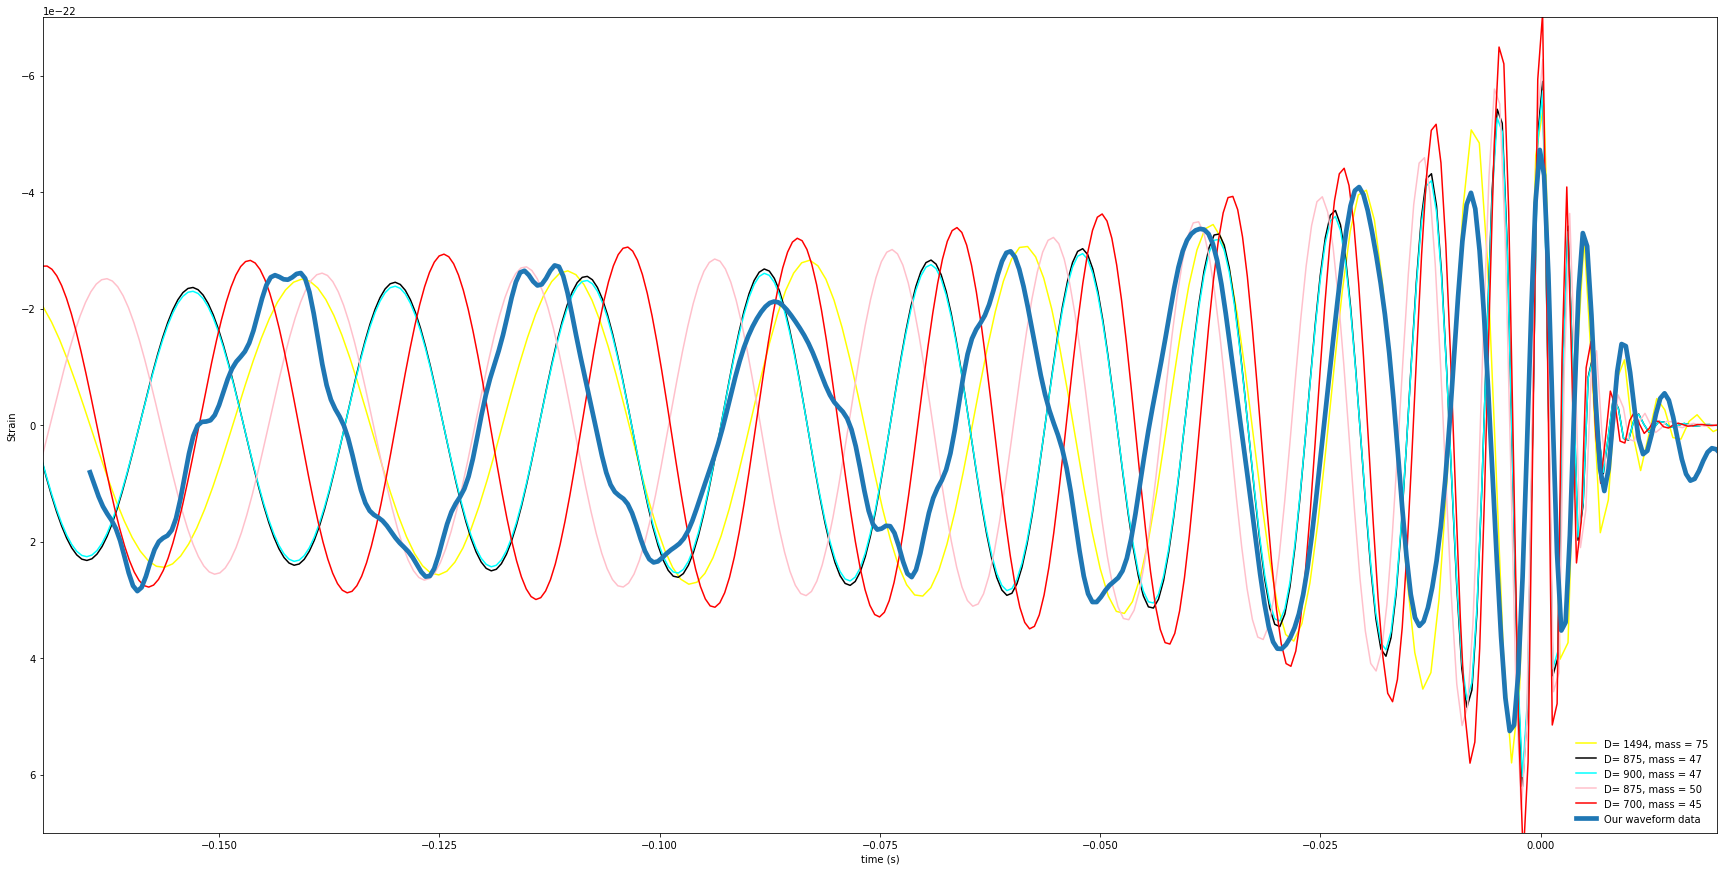

In [23]:
#plotting my guesses against the observed waveform 

plt.plot( scaled_time7, strain_sca_ref7, color='yellow', label = 'D= 1494, mass = 75')
plt.plot( scaled_time6, strain_sca_ref6, color='black', label = 'D= 875, mass = 47')
plt.plot( scaled_time5, strain_sca_ref5, color='cyan', label = 'D= 900, mass = 47')
plt.plot( scaled_time4, strain_sca_ref4, color='pink', label = 'D= 875, mass = 50')
plt.plot( scaled_time3, strain_sca_ref, color='red', label = 'D= 700, mass = 45')
plt.plot(df_shifted['time (s)'], df_shifted['strain'], label = 'Our waveform data', lw = 4.7)
x = df_shifted['time (s)']
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(frameon=False,scatterpoints=1,loc='lower right') 
plt.ylim(7*10**-22, -7*10**-22)
plt.xlim(-0.170, 0.02)
plt.gcf().set_size_inches(30, 15)
plt.show() 


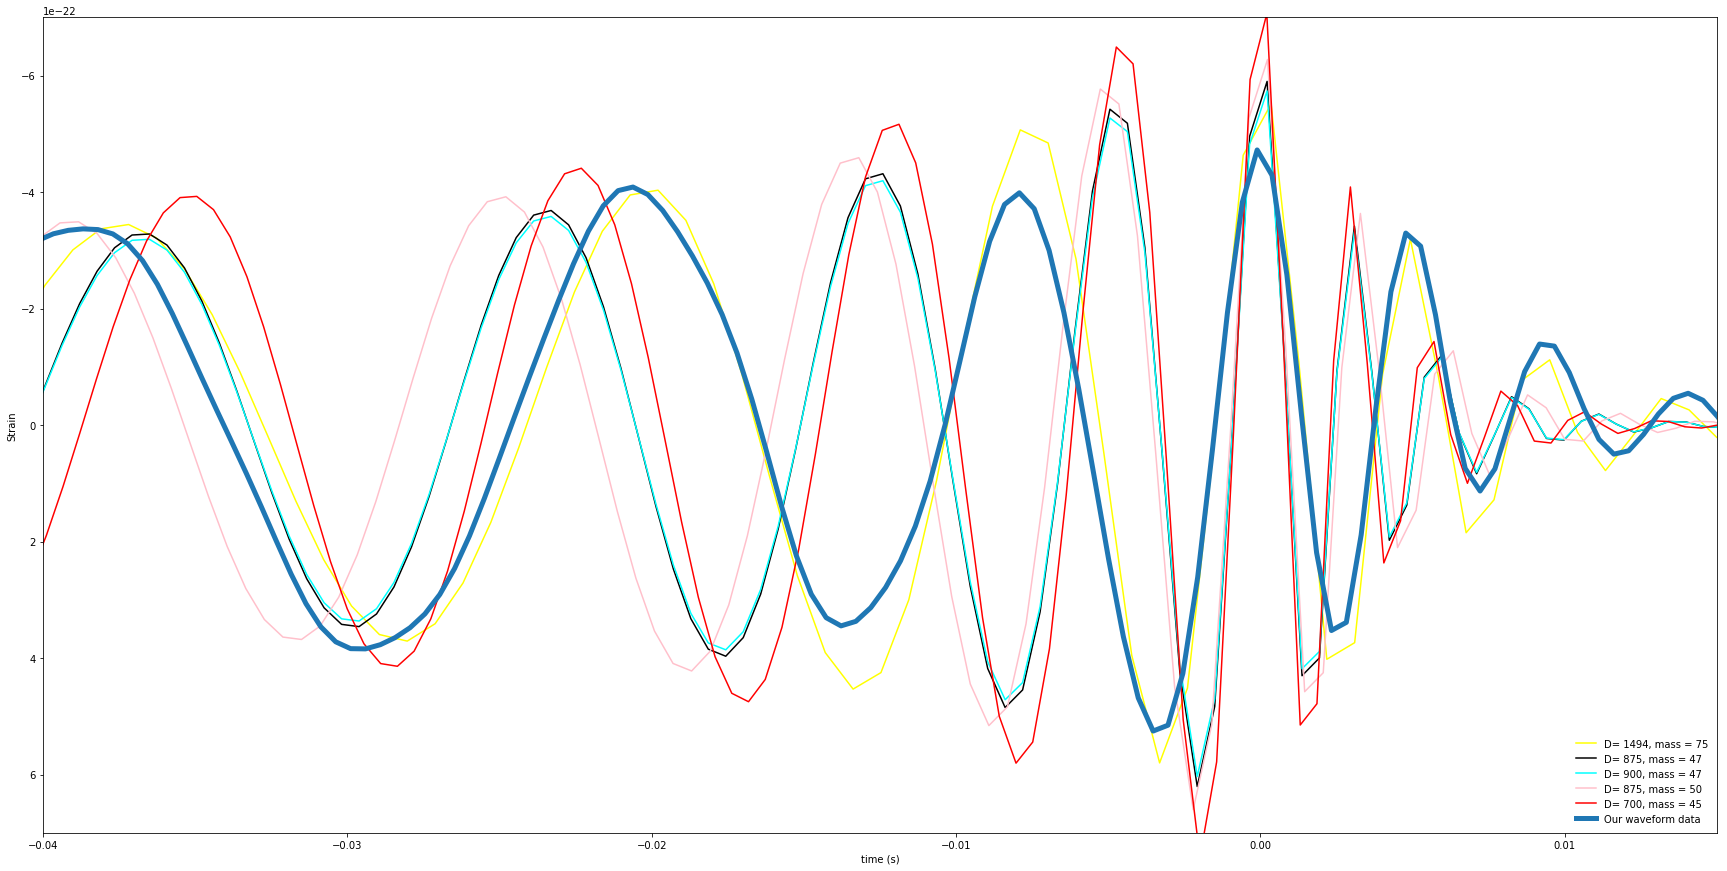

In [24]:
#limiting the x axis to look at the graph from a closer perspective
plt.plot( scaled_time7, strain_sca_ref7, color='yellow', label = 'D= 1494, mass = 75')
plt.plot( scaled_time6, strain_sca_ref6, color='black', label = 'D= 875, mass = 47')
plt.plot( scaled_time5, strain_sca_ref5, color='cyan', label = 'D= 900, mass = 47')
plt.plot( scaled_time4, strain_sca_ref4, color='pink', label = 'D= 875, mass = 50')
plt.plot( scaled_time3, strain_sca_ref, color='red', label = 'D= 700, mass = 45')
#plt.scatter( y = reference_waveform['strain'], x = reference_waveform['time (s)'], color='cyan', s = 0.3)
plt.plot(df_shifted['time (s)'], df_shifted['strain'], label = 'Our waveform data', lw = 5)
x = df_shifted['time (s)']
#plt.plot(x,rees_func(x,a,b,c),label='First guess',  c='cyan') 
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(frameon=False,scatterpoints=1,loc='lower right') 
plt.ylim(7*10**-22, -7*10**-22)
plt.xlim(-0.04, 0.015)
plt.gcf().set_size_inches(30, 15)
plt.show() 

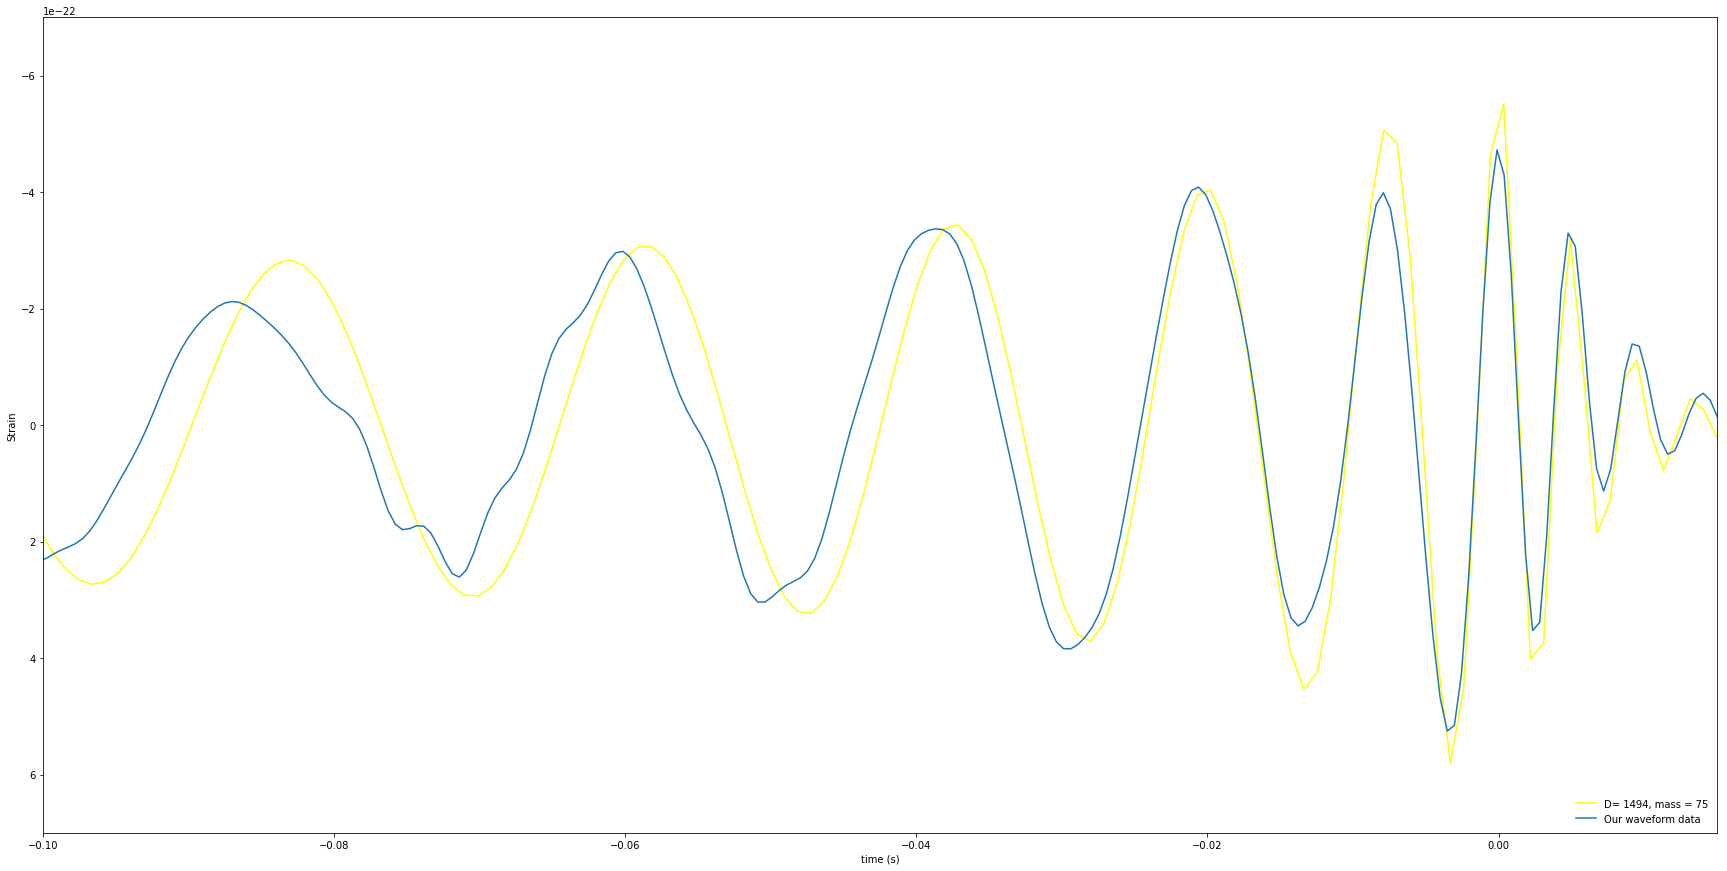

In [25]:
#show on the graph the best guess
plt.plot( scaled_time7, strain_sca_ref7, color='yellow', label = 'D= 1494, mass = 75')
plt.plot(df_shifted['time (s)'], df_shifted['strain'], label = 'Our waveform data')
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.legend(frameon=False,scatterpoints=1,loc='lower right') 
plt.ylim(7*10**-22, -7*10**-22)
plt.xlim(-0.1, 0.015)
plt.gcf().set_size_inches(30, 15)
plt.show()

The best estimate was for mass = 75 and D = 1494. There is a chance that a better guess could had been produced, however, as the two lines plotted above are not far off from one another, I decided to continue with the parameters estimated above.



***

## Part C- Get data and model to have the same x values. 

Now that we have our observed data, and can scale the template data to any mass and distance, we need to do one more fix.  Currently our data and our templates have different sampling on the $x$ axis - ie they have different values of $x$ (time(.  We need to try and match the $x$ times up so that for each value of $x$ we can compare the $y$ values (the observed strain with the strain from the scaled template).  

We need to only consider the times when we have observed data, so we will trim our data set.

1.  Our data waveform starts at some time $t_{\rm min}$. Find out what this is.  Next, take your observed data waveform and output data for $t$ > $t_{\rm min}$ and $t$ < $0$ (ie only keep information for times $\le 0$ (before the merger), or for times where there is data).  Verify, by plotting, that your new observed waveform only has data in this restricted time range. 

2. We now need to put both observed and template waveforms on the same time sampling, ie the same number of data points.  The model waveforms have approx 20,000+ time steps, yet the data has less than hundreds in the time range specified!  

We need to interpolate between our observed data and the template. To do this use the following code:

(assuming `x[index]` and `y[index]` are the observed data from Part D.1 and scaled template time is your scaled reference template to your suggested values of $M$ and $D$ from Part C3.)

```
from scipy.interpolate import interp1d

# get interpolation object using data
interp_fn =interp1d(x[index],y[index],bounds_error=False)

# now get scaled template and get the strains for the same x axis as data
interp_strain = interp_fn(scaled_template_time)

#plot
plt.plot(scaled_template_time,interp_strain)
```

Briefly verify that this works. 

*Hints:*
 * *One can use the following code example  `index = np.where((data > 5)&(data < 10))[0]`. This type of statement returns a list of indices (`index`) where the conditions in the bracket have been met.  `data_[index]` pulls out `data` that satisfy the conditions in the brackets above.*

**Answer**

*Your answer here*

In [26]:
#Part C, 1
#Finding the minimum t value 
min_time = min(df_shifted['time (s)'])
print(min_time)

-0.164657592773


In [27]:
#chopping our waveform to the correct range
chop_shift = (df_shifted[df_shifted['time (s)'] < 0]).copy()
chop_shift = chop_shift[chop_shift['time (s)']> min_time]
print(chop_shift)

           strain  time (s)
1    1.019082e-22 -0.164170
2    1.226521e-22 -0.163681
3    1.396412e-22 -0.163193
4    1.522380e-22 -0.162704
5    1.633110e-22 -0.162216
6    1.775375e-22 -0.161728
7    1.983757e-22 -0.161240
8    2.254330e-22 -0.160752
9    2.538071e-22 -0.160263
10   2.759307e-22 -0.159775
11   2.850641e-22 -0.159286
12   2.786333e-22 -0.158798
13   2.596371e-22 -0.158310
14   2.353284e-22 -0.157822
15   2.137806e-22 -0.157334
16   2.000425e-22 -0.156845
17   1.938052e-22 -0.156357
18   1.897485e-22 -0.155869
19   1.803912e-22 -0.155380
20   1.600159e-22 -0.154892
21   1.277141e-22 -0.154404
22   8.805584e-23 -0.153916
23   4.908081e-23 -0.153427
24   1.863223e-23 -0.152939
25   8.460792e-25 -0.152451
26  -5.512485e-24 -0.151962
27  -6.135955e-24 -0.151474
28  -8.251973e-24 -0.150986
29  -1.721499e-23 -0.150498
30  -3.427952e-23 -0.150009
..            ...       ...
308  3.306569e-22 -0.014267
309  3.447170e-22 -0.013778
310  3.369453e-22 -0.013291
311  3.134974e-22 -0

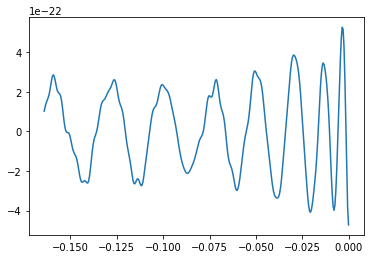

In [28]:
#using the plot to ensure that the chopping proccess worked
plt.plot(chop_shift['time (s)'], chop_shift['strain'])
plt.show()

In [29]:
#sanity check
chop_shift.shape

(337, 2)

In [30]:
#chopping the reference strain
reference_waveform2 = pd.DataFrame(list(zip(scaled_time7, strain_sca_ref7)), columns=[ 'time (s)', 'strain'])
chopped_reference = (reference_waveform2[reference_waveform2['time (s)'] < 0]).copy()

reference_waveform2.shape

(24622, 2)

In [31]:
chopped_reference.shape

(24466, 2)

Text(0,0.5,'Strain')

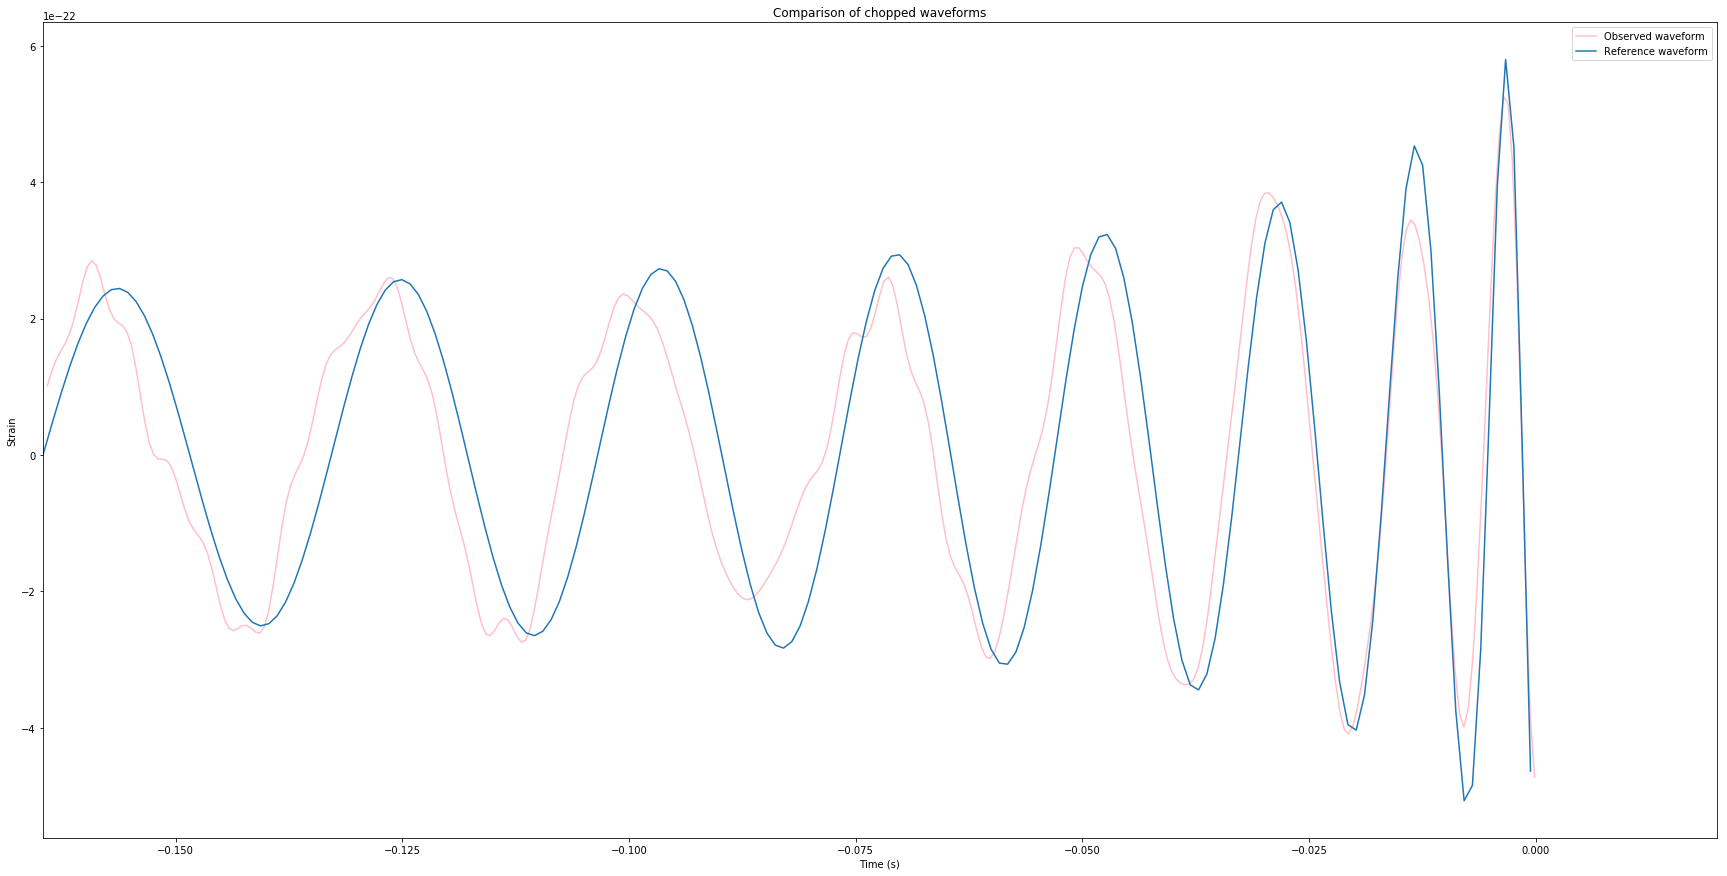

In [32]:
#plotting the graph to verify whether the chopping process was correct

plt.plot(chop_shift['time (s)'], chop_shift['strain'], c = 'pink', label = 'Observed waveform')
plt.plot(chopped_reference['time (s)'], chopped_reference['strain'], label = 'Reference waveform')
plt.legend()
plt.title('Comparison of chopped waveforms')
plt.gcf().set_size_inches(30, 15)
plt.xlim(min_time, 0.02)
plt.xlabel('Time (s)')
plt.ylabel('Strain')

As we can see above, the waveform chopping process was successful. Both, the observed waveform and the reference waveform have the same length.

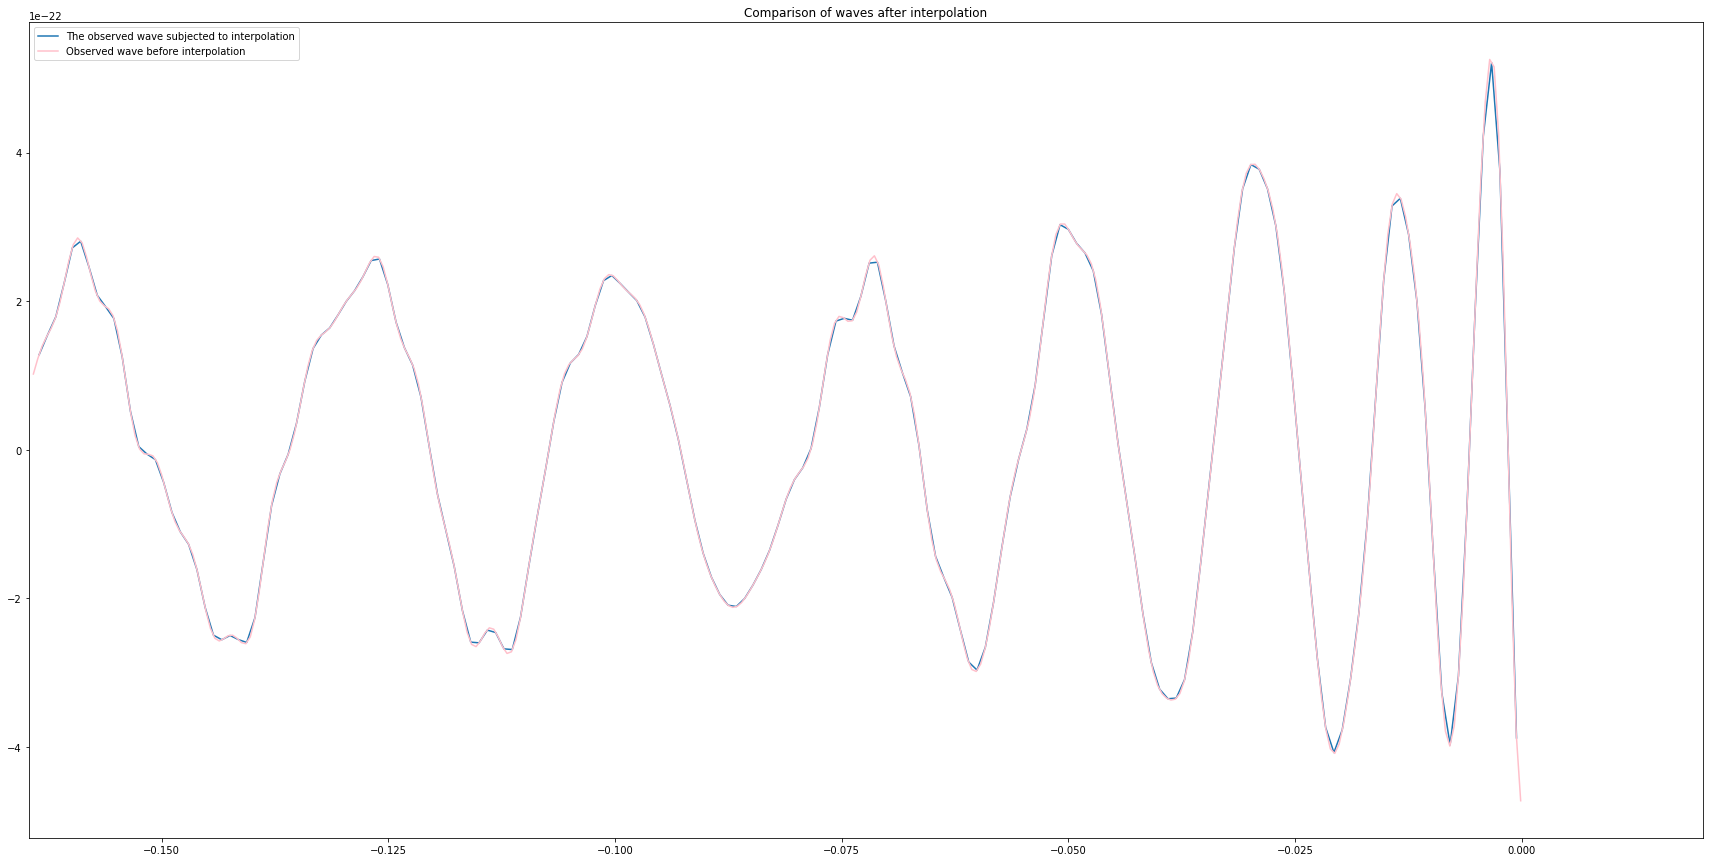

In [33]:
# obtain the interpolation object from our data
interp_fn =interp1d(chop_shift['time (s)'], chop_shift['strain'],bounds_error=False)
# loading the scaled template and adjusting the strains so they are on the same x axis as data
interp_strain = interp_fn(chopped_reference['time (s)'])
plt.plot(chopped_reference['time (s)'],interp_strain, label = 'The observed wave subjected to interpolation')
#print(interp_strain)
plt.plot(chop_shift['time (s)'], chop_shift['strain'], label = 'Observed wave before interpolation', c = 'pink')
plt.xlim(min_time,0.02)
plt.title('Comparison of waves after interpolation')
plt.legend()
plt.gcf().set_size_inches(30, 15)

In [34]:
chopped_reference.size

48932

In [35]:
interp_strain

array([            nan,             nan,             nan, ...,
        3.74980266e-22, -3.27815315e-24, -3.87896123e-22])

In [36]:
#ensuring that both of them have the same length
chopped_reference = (chopped_reference[chopped_reference['time (s)'] < 0]).copy()
chopped_reference = chopped_reference[chopped_reference['time (s)']> min_time]
index = chopped_reference.index
time_values = chopped_reference['time (s)']
strain_values = interp_strain[index]


In [37]:
print(len(time_values))

180


In [38]:
print(len(strain_values))

180


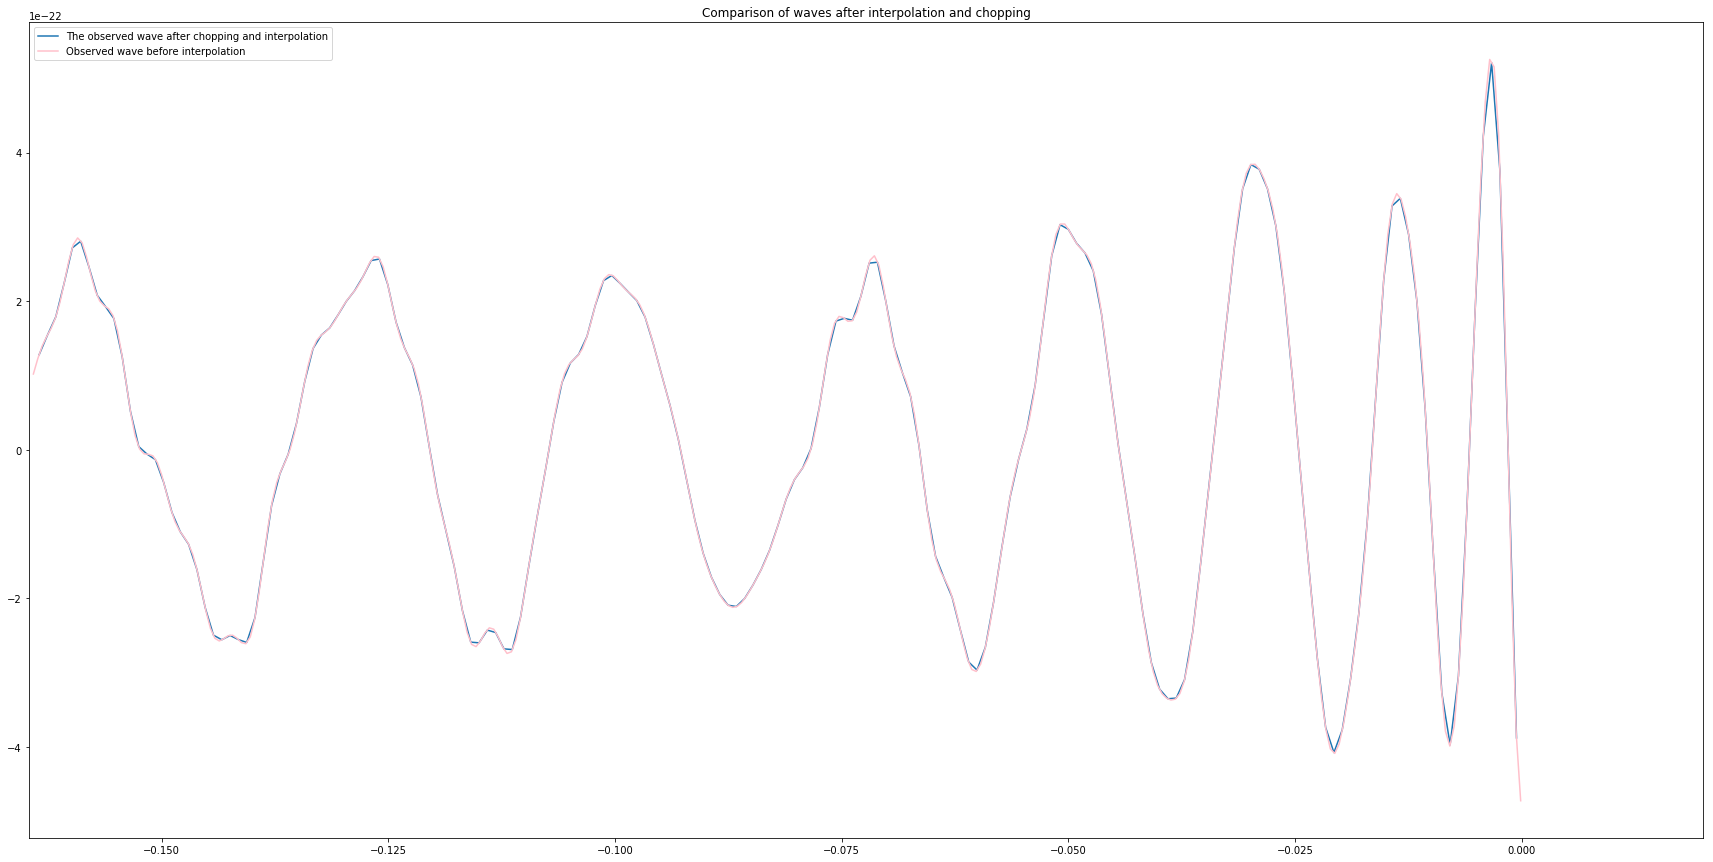

In [39]:
# plot
plt.title('Comparison of waves after interpolation and chopping')

plt.plot(time_values, strain_values, label = 'The observed wave after chopping and interpolation')
#print(interp_strain)
plt.plot(chop_shift['time (s)'], chop_shift['strain'], label = 'Observed wave before interpolation', c = 'pink')
plt.xlim(min_time,0.02)
plt.legend()
plt.gcf().set_size_inches(30, 15)

The graph above proves that the Part C of our miniproject was successful. 

## Part D - Estimating the best fit total mass using MCMC 

Now that we know how to make the scaled template (ie 40Msun,1Mpc template file) and the observed data have the same time sampling, we can use MCMC to find out the total mass of the system that made the data we see.  

*If you run into any difficulties completing this component of the coursework, you can still attempt the following parts using your by-eye estimates for $M$ and $D$ from Part B.*

Think carefully about what the likelihood function will be in this case (see Chapters 6-9).  

1. Use MCMC to sample the total mass, $M$ to produce a best-fit value for your data. 

2.  Display the results in an appropriate manner and comment on your findings, as well as your results from the MCMC. 

3. Report the median and 90% credible limits on your values.  
 
You may assume that:
- the noise is described by a Gaussian distribution, 
- the total mass of the system is in the range [20,100] $M_{sun}$.
 
_Hints:_

 * _Think very carefully about the form of your likelihood since here we are comparing observed data with a model_
 
 * _You should work with "log(Likelihood)" to avoid numerical errors  - note this will affect both your posterior and the step in the MCMC chain where we usually write $p_{\rm proposed}/p_{\rm current}$_

 * _The step size between samples of the MCMC is quite important. A suggested value for the mass is $0.1\,M_{sun}$_
 
 * _The initial guess of your mass is also very important. You may find yourself getting into a local minimum rather than your code finding the true minimum._
 
 * _Test your MCMC on a small number of samples (e.g. 10-100) before trying it with a larger number (e.g. $10^5$ or $10^6$)_
 
 * _At the end, ask yourself if you need to include every sample?_
 
 * _Depending on your step size, this part can take a long time to run. Suggest that you move all your plotting routines to a different code cell to save you re-running everything 10000s of times when you just want to change a plot command._
 
 * _To find out how long it will take for a Jupyter notebook to compile the MCMC code cell, add the following snippet to your code before you go into your MCMC loop (where Nsteps is the number of steps your MCMC is using):_
 
```def time_spent_waiting(n):
    from datetime import datetime,timedelta
    preddur=[n*0.01,n*0.02]
    print('predicted duration: {:.2f}-{:.2f} mins'.format(preddur[0]/60.,preddur[1]/60.))
    return```

**Answer:**

*Your answer here*



In [40]:
#double checking what our strain values look like
strain_values

array([            nan,  1.27944746e-22,  1.54304459e-22,  1.78829246e-22,
        2.23728085e-22,  2.71761129e-22,  2.80649137e-22,  2.45975090e-22,
        2.07779703e-22,  1.92541423e-22,  1.76590534e-22,  1.25254471e-22,
        5.15532545e-23,  4.19655710e-24, -5.94051718e-24, -1.32874556e-23,
       -4.40051940e-23, -8.44436261e-23, -1.10404439e-22, -1.27221367e-22,
       -1.61092367e-22, -2.12347424e-22, -2.49581480e-22, -2.55762287e-22,
       -2.50025345e-22, -2.55530625e-22, -2.59390953e-22, -2.26020054e-22,
       -1.50349713e-22, -7.52891082e-23, -3.25697628e-23, -6.12179486e-24,
        3.53237559e-23,  9.20389229e-23,  1.36209666e-22,  1.54366869e-22,
        1.63923766e-22,  1.81271963e-22,  1.99667019e-22,  2.13994267e-22,
        2.32635558e-22,  2.54621218e-22,  2.56698791e-22,  2.22306093e-22,
        1.71708750e-22,  1.37545121e-22,  1.13823465e-22,  7.09490641e-23,
        4.13140013e-24, -6.05067280e-23, -1.08394961e-22, -1.56800542e-22,
       -2.16670912e-22, -

In [41]:
#removing the nan values form the strain so we may perform calculations and visualise the data
strain_values_no_nan = strain_values[np.logical_not(np.isnan(strain_values))]

In [42]:
time_values

24286   -0.164444
24287   -0.163529
24288   -0.162613
24289   -0.161698
24290   -0.160782
24291   -0.159867
24292   -0.158951
24293   -0.158036
24294   -0.157120
24295   -0.156205
24296   -0.155289
24297   -0.154374
24298   -0.153458
24299   -0.152543
24300   -0.151627
24301   -0.150712
24302   -0.149796
24303   -0.148880
24304   -0.147965
24305   -0.147049
24306   -0.146134
24307   -0.145218
24308   -0.144303
24309   -0.143387
24310   -0.142472
24311   -0.141556
24312   -0.140641
24313   -0.139725
24314   -0.138810
24315   -0.137894
           ...   
24436   -0.027115
24437   -0.026200
24438   -0.025284
24439   -0.024369
24440   -0.023453
24441   -0.022538
24442   -0.021622
24443   -0.020707
24444   -0.019791
24445   -0.018876
24446   -0.017960
24447   -0.017045
24448   -0.016129
24449   -0.015213
24450   -0.014298
24451   -0.013382
24452   -0.012467
24453   -0.011551
24454   -0.010636
24455   -0.009720
24456   -0.008805
24457   -0.007889
24458   -0.006974
24459   -0.006058
24460   -0

(array([5.41529114e+20, 1.08305823e+21, 5.41529114e+20, 5.41529114e+20,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.62458734e+21,
        5.41529114e+20, 1.62458734e+21, 5.41529114e+20, 1.08305823e+21,
        5.41529114e+20, 1.62458734e+21, 2.70764557e+21, 3.24917469e+21,
        0.00000000e+00, 1.08305823e+21, 2.16611646e+21, 1.62458734e+21,
        1.62458734e+21, 5.41529114e+20, 1.08305823e+21, 1.62458734e+21,
        1.62458734e+21, 2.16611646e+21, 1.62458734e+21, 5.41529114e+20,
        1.08305823e+21, 1.08305823e+21, 1.08305823e+21, 1.62458734e+21,
        1.08305823e+21, 1.62458734e+21, 0.00000000e+00, 2.16611646e+21,
        1.62458734e+21, 5.41529114e+20, 2.16611646e+21, 2.16611646e+21,
        1.62458734e+21, 0.00000000e+00, 1.08305823e+21, 5.41529114e+20,
        1.08305823e+21, 2.16611646e+21, 1.08305823e+21, 5.41529114e+20,
        2.16611646e+21, 1.08305823e+21, 1.08305823e+21, 2.16611646e+21,
        1.08305823e+21, 1.08305823e+21, 1.62458734e+21, 1.083058

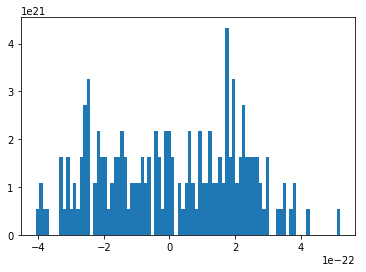

In [43]:
#investigating the distribution of our strain values
plt.hist(strain_values_no_nan, bins=90,density=True)


The histogram shows that the distribution is not really Gaussian. Nonetheless, we are going to assume it is, according to the instructions provided in the miniproject

We assume that the prior and the likelihood are Gaussian. Therefore, we need to multiply two normal distributions together, resulting in:

prob = norm(likelihood ~ mean, likelihood ~ err) x  norm(prior ~ mean, prior~err) 

In [44]:
#calculating the mean values
refer_m = chopped_reference['strain']
refer_mean = refer_m.mean(axis=0)
print('The mean value of our chopped reference strain is equal to: ', refer_mean)
refer_std = refer_m.std(axis = 0)
print('The standard deviation of our chopped reference is equal to:', refer_std)

('The mean value of our chopped reference strain is equal to: ', 8.73511235642248e-24)
('The standard deviation of our chopped reference is equal to:', 2.290277888400946e-22)


In [45]:
waveform_mean = mean(strain_values_no_nan)
print('The mean of an interpolated observed waveform equals:', waveform_mean)
waveform_std = np.std(strain_values_no_nan)
print('The standard deviation of the interpolated waveform equals:', waveform_std)
waveform_variance = np.var(strain_values_no_nan)
print('The variance of the interpolated waveform equals:', waveform_variance)

('The mean of an interpolated observed waveform equals:', 7.791267922669852e-24)
('The standard deviation of the interpolated waveform equals:', 2.0922413698700352e-22)
('The variance of the interpolated waveform equals:', 4.377473949795641e-44)


In [46]:
#noise = np.var(strain_values_no_nan)
#noise

In order to derive the best fitting model parameters between our model and data utilising the MCMC, we need to calculate the log likelihood for chi-square:


> $ \mbox{log likelihood}  = -0.5 \dfrac{\sum(y_i-y_{\rm model})^2}
{\sigma^2}$.

Where:

$y_i$ - observed waveform sigma values

$y_{\rm model}$ - sigma values for reference waveform

${\sigma^2}$ - noise observed in the data, calculated in Part A-3 of the miniproject



In [47]:
#log_likelihood = - 0.5*((sum(((chopped_reference['strain'])-time_values))**2)/noise)

In [48]:
strain_values_no_nan = pd.DataFrame(data= strain_values_no_nan)
# da = {1.279447e-22}
# df2 = pd.DataFrame(data= da) 
# strain_values_no_nan = strain_values_no_nan.append(df2, ignore_index= True, ) 
# # #strain_values_no_nan = strain_values_no_nan[np.logical_not(np.isnan(strain_values_no_nan))]

In [49]:
#check whether the nan values were dropped
scale_strain_ref(strain_values_no_nan)

[0      1.605732e-25
 1      1.936552e-25
 2      2.244343e-25
 3      2.807832e-25
 4      3.410657e-25
 5      3.522203e-25
 6      3.087037e-25
 7      2.607677e-25
 8      2.416434e-25
 9      2.216247e-25
 10     1.571969e-25
 11     6.470037e-26
 12     5.266763e-27
 13    -7.455468e-27
 14    -1.667602e-26
 15    -5.522740e-26
 16    -1.059784e-25
 17    -1.385598e-25
 18    -1.596654e-25
 19    -2.021742e-25
 20    -2.665003e-25
 21    -3.132298e-25
 22    -3.209868e-25
 23    -3.137868e-25
 24    -3.206961e-25
 25    -3.255409e-25
 26    -2.836597e-25
 27    -1.886919e-25
 28    -9.448934e-26
 29    -4.087571e-26
            ...     
 149    3.781788e-25
 150    2.694001e-25
 151    1.204359e-25
 152   -4.223786e-26
 153   -2.016311e-25
 154   -3.520006e-25
 155   -4.689835e-25
 156   -5.114966e-25
 157   -4.732785e-25
 158   -3.874235e-25
 159   -2.765501e-25
 160   -1.242691e-25
 161    8.010319e-26
 162    2.870157e-25
 163    4.117789e-25
 164    4.247084e-25
 165    3.635

In [50]:
noise

7.310677e-23

In [51]:
noise = np.var(strain_values_no_nan)
print(noise)

0    4.377474e-44
dtype: float64


In [52]:
def chi_log_likelihood(mass2):
    chi_strain_ref = scale_strain_ref(strain_values_no_nan)
    subtraction = (strain_values_no_nan - chi_strain_ref)
    subtraction1 = subtraction[np.logical_not(np.isnan(subtraction))]
    sq_sub = subtraction1*subtraction1
    sum_differences = np.sum(sq_sub)
    #print(sum_differences)
    likelihood = -0.5*(sum_differences/noise)
    return(likelihood)
 #- 0.5*((sum(((chopped_reference['strain'])-time_values))**2)/noise)

In [53]:
def ls(mass2):
    chi_strain_ref = scale_strain_ref(strain_values_no_nan)
    subtraction = (strain_values_no_nan - chi_strain_ref)
    subtraction1 = subtraction[np.logical_not(np.isnan(subtraction))]
    sq_sub = subtraction1*subtraction1
    sum_differences = np.sum(sq_sub)
    return (sum_differences)

In [54]:
logaritmic_prior = chi_log_likelihood(74)
print(logaritmic_prior)

0   -89.399294
dtype: float64


In [55]:
def log_posterior(mass2):
    posterior = logaritmic_prior + chi_log_likelihood(mass2)
    return(posterior)

In [56]:
def posteriorVal(mass2):
  postval = chi_log_likelihood(mass2) + logaritmic_prior
  return postval

A Markov chain(MC) is constructed in a way in which each future step is solely related to the step in which the algorithm is in at the moment. MC investigates how probabilistically related is a specific sequence of events. Each outcome of those probabilities specifies how the next step is going to proceed. The steps have no memory of the steps which happened beforehand. 

Monte Carlo Markov Chain (MCMC) aims to calculate the the approximation of a probability distribution. Therefore, it may be used in our miniproject as we know how to scale the waveform and calculate the corresponding mass of an object which produced the waveform. In here, the theta value will be the mass of an object which identity we try to determine. 

MCMC algorithm which we used, the Metropolis algorithm, explores parameter space by having the histogram of their samples producing the distribution it is targeting. 

In order to obtain a representative sample of points from the posterior

$p(\theta | D) \propto p(D | \theta) p(\theta)$

the  $p(D | \theta) p(\theta)$ needs to be the target distribution. The Bayesian posterior is created by the chain of points resultant from the MCMC run. Those points are a random sample from the posterior.



A target distribution is denoted as $P(\theta)$. 

MCMC algorithm is made of the following steps:

 $\theta_{current}$ is a guess at a dependent variable. This is followed by a random step in the variables to a new location 

$\theta_{proposed} = \theta_{current} + \Delta {\theta}$.

The value of the function at $\theta_{proposed}$ must be greater than the value of function at $\theta_{current}$ 
 
$P(\theta_{proposed}) > P(\theta_{current})$

in order for the algorithm to make a move to the point $\theta_{proposed}$. 

Nonetheless, in case 

$P(\theta_{proposed}) < P(\theta_{current})$

it is necesseraily to consider the probability of moving to a different part of a chain $\theta_{proposed}$ as

$p_{move} = \dfrac{ P(\theta_{proposed}) }{ P(\theta_{current}) }.$

To summarise:

$p_{move} = \text{min} \left( \dfrac{ P(\theta_{proposed}) }{ P(\theta_{current}) } , 1 \right)$

In a situation where $p_{move} < 1$, we will draw a *uniform random number* between 0 and 1 ( $u_{rnd}$ )

The suggested move will be accepted if

$u_{rnd} \leq p_{move}$

If not the above is not true, the move does not take place and the algorithm stays in the same location.

The $\theta_{current}$ will be updated with the new position ans it's value os stored.

All of the steps will be repeated from the start, except that our guess is no longer needed since the whole process moved to $\theta_{current}$.

Plagiarism statement: the functions below were written based on notebooks provided by our module convenor.

In [57]:
def MCMC(N_mcmc, n_inita, prior_init, step):
    log_prior= prior_init
    N_mcmc= N_mcmc
    n_inita= n_inita
    M_obecny[0,0]=20
    M_obecny= np.zeros((N_mcmc+1,n_inita+1))
    M_mean= np.zeros((n_inita))
    M_std= np.zeros((n_inita))
    counter= 5
    # initiation of the chain with different M values
    for j in range(0,n_inita):
       M_obecny[0,j+1]=M_obecny[0,j]+ 25

       for i in range(0,N_mcmc):
            # Orgering the algorith to make random steps
            dM=np.random.normal(scale=step)
            M_proposed = M_obecny[i,j] + dM

            # Ensuring that none of the steps is negative
            if M_proposed <0:
               M_proposed=abs(M_proposed)
           
            # decide what to do based on probabilities for the proposed mass 
            # assigning the prior based on the proposed mass
            if ((posteriorVal(M_proposed))>(posteriorVal(M_obecny[i,j]))).bool():
               M_obecny[i+1,j]=M_proposed
               log_prior=posteriorVal(M_proposed)
            else:
              p_move=posteriorVal(M_proposed)/posteriorVal(M_obecny[i,j])*0.5
              move_granice=np.random.uniform(0,1)
              
              if (p_move>=move_granice).bool():
                counter+=1
                M_obecny[i+1,j]=M_proposed
                log_prior=posteriorVal(M_proposed)
                
              else:
                M_obecny[i+1,j]=M_obecny[i,j]
               

    return M_obecny, counter


In [58]:
def mean_std(M_obecny,burn):
 M_mean=M_obecny[burn:,:-1].mean(axis=0)
 M_std=M_obecny[burn:,:-1].std(axis=0)
 return M_mean, M_std

In [59]:
def plot_mcmc1(M_obecny, mean, std, N_mcmc, n_inita, burn ):
    for j in range(0,n_inita):
        plt.plot(M_obecny[:,j])
        plt.xlabel('run number')
        plt.ylabel('Mass($M_\odot$)')
        plt.xlim(0, 2000)
    x=np.linspace(70,80,130)
    plt.show()

In [60]:
def plot_mcmc2(M_obecny, mean, std, N_mcmc, n_inita, burn):
    xmarkov=np.linspace(0,N_mcmc, N_mcmc+1)
    for j in range(0,n_inita):
      plt.semilogy(M_obecny[:,j],xmarkov)
      plt.ylabel('Number of runs completed')
      plt.ylim(0, 4500)
      plt.xlabel('Mass of sun')
    plt.title('MCMC with burn removed ')
    plt.show()

In [71]:
def plot_mcmc3(M_obecny, mean, std, N_mcmc, n_inita,burn ):
    plt.figure(figsize=(15, 8))
    x=np.linspace(0, 130)
    for j in range(0,n_inita):
      posterior_mcmc=norm.pdf(x,mean[j],std[j])
      plt.plot(x,posterior_mcmc,label='$M_i$= '+str((j+1)*20),lw=1)
      plt.legend(loc='upper right')
      plt.xlabel('Mass of sun')
      plt.xlim(0, 150)
      plt.ylim(0, 0.1)
      #plots the suggested posteriors
      plt.ylabel('PMF')
    plt.show()

In [62]:
def plot_mcmc4(M_obecny, mean, std, N_mcmc, n_inita,burn):
    xmarkov=np.linspace(0, N_mcmc, N_mcmc+1-burn)
    for j in range(0,n_inita):
      plt.ylabel('Number of runs')
      plt.xlabel('Mass of sun')
      plt.ylim(0, 700)
      plt.semilogy(M_obecny[burn:,j],xmarkov)
     
    plt.show()

In [63]:
chi_log_likelihood(74)

0   -89.399294
dtype: float64

In [64]:
N_mcmc=50000  
step=0.2
n_inita=5 
burn=20000
prior_init = chi_log_likelihood(75) 

In [65]:
M_obecny, counter= MCMC(N_mcmc, n_inita, prior_init,step)


In [66]:
print('M values investigated:', M_obecny[0,:-1])


('M values investigated:', array([ 20.,  40.,  60.,  80., 100.]))


In [67]:
std, mean = mean_std(M_obecny, burn)


In [68]:
print('Means: ', mean, 'Standard Deviation:', std )

('Means: ', array([ 16.07773558,  55.18935757, 109.83132916,  71.82750107,
        82.95213186]), 'Standard Deviation:', array([ 8.93765586,  5.04865092, 14.47348066, 10.80010674,  7.19681079]))


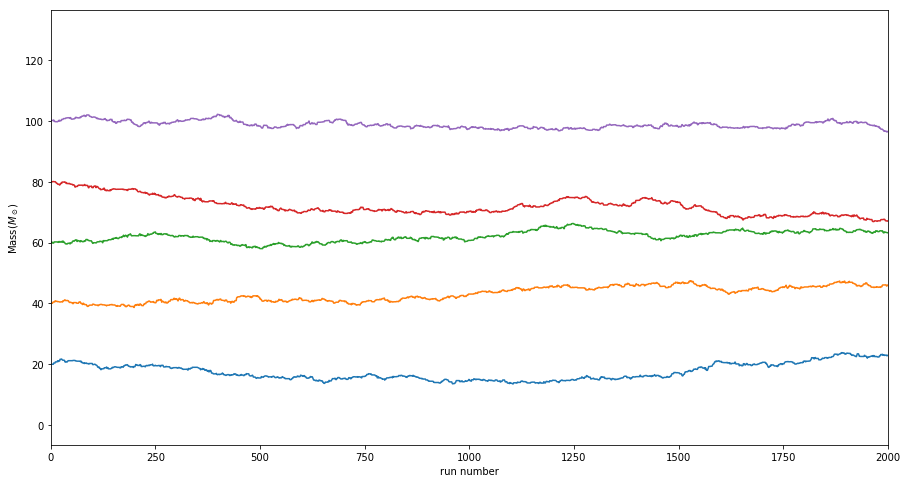

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


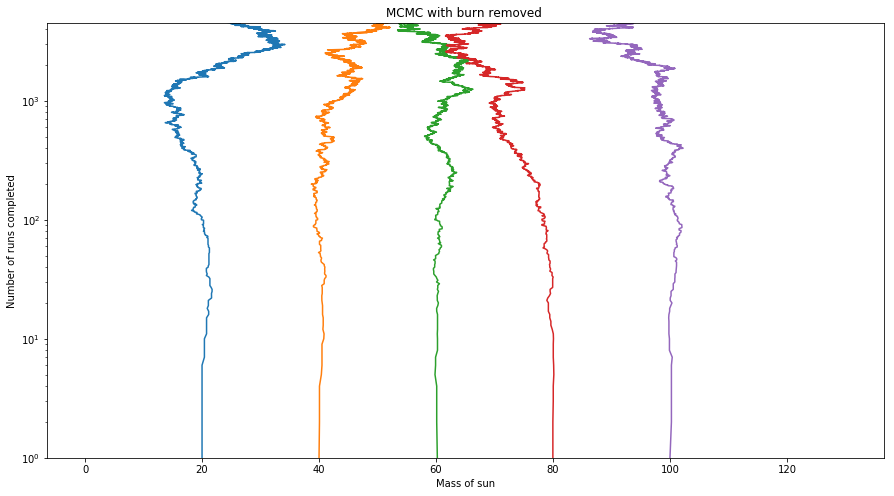

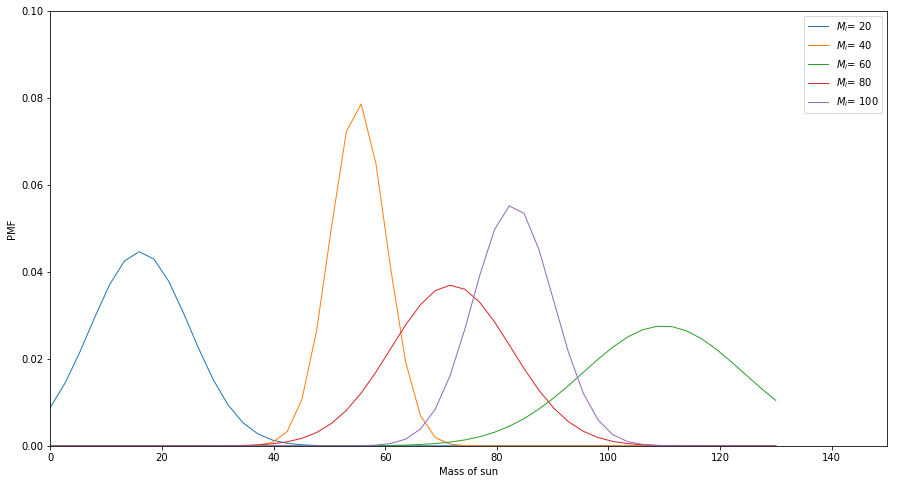

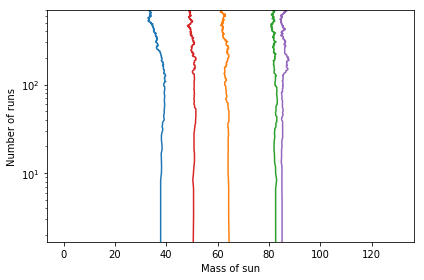

In [69]:
plot_mcmc1(M_obecny, mean, std, N_mcmc, n_inita,burn)
plot_mcmc2(M_obecny, mean, std, N_mcmc, n_inita, burn)
plot_mcmc3(M_obecny, mean, std,N_mcmc, n_inita,burn)
plot_mcmc4(M_obecny, mean, std, N_mcmc, n_inita,burn)


Unfortunately, after re-running the notebook, the MCMC failed. Before the notebook was re-run, we could observe a convergence at approximately 77 mass of sun. As seen above, that is no longer a case. It is likely that the MCMC got stuck at local maxima. Local maxima are areas where the likelihood is higher in comparison to its close neighbors, but lower than for neighbors that are further away. We could see that lines standing for 60 and 80 mass of sun were somewhat getting close to convergence. Nonetheless, the patter which those followed shows they kept stucking at local maxima. 

There is a chance that one of the turning parameters was off. Turning parameters influence the behavior of the MCMC sampler, however they do not classify as parameters of the model (one of those could be the standard deviation of a proposal distribution). Turning parameters muct be chosen with caution due to their ablity to change the rejection rate, substantially influencing the performance of the sampler.

We attempted improving the results by modifying the cycles and steps of MCMC sampling. Nonetheless, this was time consuming and the correct result wasn't reproduced before the deadline submission. We decided to procede to part E with the prediction we obtain before re-runig our code. 

## Part E - Putting it all together 

If you run into any difficulties completing Parts E and F, you can still attempt this part using your by-eye estimates for $M$ and $D$ from Part B.

1. Calculate the chirp mass for your system and the individual masses of your merging bodies. Comment on your individual masses. 

2. Comment on what your analysis suggests are the best astrophysical candidates for the merging objects?  What information are you missing to rule out other astrophysical candidates?

**Answer:**

The 'Chirp mass' is given by:
$$M_{ch} = \dfrac{(M_1 M_2)^{3/5}}{(M_1 + M_2)^{1/5}}.$$

The assumption of our system was that both objects have equal mass. The MCMC converged around M = 77 solar mass

We have an equal-mass system (i.e $q=1$) with total mass $M=M_1 + M_2$ at a distance $D$ (not spinning)

In [70]:
chirp_mass = ((38.5*38.5)**(3/5))/(38.5**(1/5))
mass = 77/2
print(mass)
print('The Chirp mass (M_sun):', chirp_mass, 'The mass of an observed object:', mass)

38
('The Chirp mass (M_sun):', 1.0, 'The mass of an observed object:', 38)


The observed mass sugests a merger of two black holes. We reached this conclusion based on similar gravitational wave events observed in GWTC-1 (Abbott
et al. 2019). It is a gravitational-wave transient catalog of
runs of aLIGO/aVIRGO. The Chirp mass for those events ranged from 7.9 to 35.4 mass of sun. The smallest black hole observed was 7.7 mass of sun, whereas the largest one equalled to 50.2 mass of sun. 

In order to be sure that our guess is correct, it would be necessary to know the readings for our observed waveform from two different locations, in the same manner as Advanced LIGO (aLIGO) and Advanced Virgo (aVIRGO) cooperate. This allows for excluding the noise which may be present on earth and better estimation of the distance of the observed object.
Seven out of the ten black holes detected by those institutions were stellar-mass black hole whose Chirp mass was above 30 mass of sun.
It is suggested that the astrophysical origins of those could be from, among many others: isolated massive stellar binaries ( Miyamoto
et al. 2017; Belczynski et al. 2020), dynamical formation in
dense stellar clusters (O’Leary et al. 2006; Rodriguez et al. 2015;
Kumamoto et al. 2019), rapidly rotating massive stars (Mandel & de Mink 2016), and the compact binary formation
in disk region (e.g. Tagawa et al. 2019).
There is a high chance that those were from massive field binaries of Population III (Pop III), expected
to be born quite massive, between 10-100 mass of sun (e.g Hosokawa et al.
2011) and would initiate rather large binary black holes. Pop III binaries often end up transforming into massive stellar black holes with Chirp mass higher than 30 mass of sun.

In [72]:
#End of code

***